<a href="https://colab.research.google.com/github/SARANYA-36/Algorithm/blob/main/dijkstraipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import heapq
class Graph:
  def __init__(self,vertices):
    self.V = vertices
    self.graph = {v:[] for v in range(vertices)}
  def add_edge(self,u,v,weight):
    self.graph[u].append((v,weight))
  def dijkstra(self,start):
    distances = {v: float('inf') for v in range (self.V)}
    distances[start] = 0
    priority_queue = [(0, start)]
    while priority_queue:
      current_distance, current_vertex = heapq.heappop(priority_queue)
      for neighbour,weight in self.graph[current_vertex]:
        distance = current_distance + weight
        if distance < distances[neighbour]:
          distances[neighbour] = distance
          heapq.heappush(priority_queue,(distance, neighbour))
    print(f"Shortest paths from vertex {start}:")
    for vertex in range(self.V):
      print(f"Vertex {vertex} : Distance {distances[vertex]}")
if __name__ == "__main__":
  g = Graph(5)
  g.add_edge(0,1,10)
  g.add_edge(0,4,5)
  g.add_edge(1,2,1)
  g.add_edge(1,4,2)
  g.add_edge(2,3,4)
  g.add_edge(3,0,7)
  g.add_edge(4,1,3)
  g.add_edge(4,2,9)
  g.add_edge(4,3,2)
  start_vertex = 0
  g.dijkstra(start_vertex)

Shortest paths from vertex 0:
Vertex 0 : Distance 0
Vertex 1 : Distance 8
Vertex 2 : Distance 9
Vertex 3 : Distance 7
Vertex 4 : Distance 5


In [ ]:
import heapq
class Graph:
  def __init__(self,vertices):
    self.V = vertices
    self.graph = {v: [] for v in range(vertices)}
  def add_edge(self, u, v, weight):
    self.graph[u].append((v,weight))
    self.graph[v].append((u,weight))
  def prim_mst(self):
    visited = [False] * self.V
    min_heap = [(0,0)]
    mst_cost = 0
    mst_edges = []
    while min_heap:
      weight, u = heapq.heappop(min_heap)
      if visited[u]:
        continue
      visited[u] = True
      mst_cost += weight
      for v,w in self.graph[u]:
        if not visited[v]:
          heapq.heappush(min_heap,(w,v))
          mst_edges.append((u,v,w))
    print("Minimum Spanning Tree edges:")
    for u, v, w  in mst_edges:
      if visited[u] and visited[v]:
        print(f"{u} - {v} : {w}")
    print(f"Total cost of MST: {mst_cost}")
if __name__ == "__main__":
    g = Graph(5)
    g.add_edge(0, 1, 2)
    g.add_edge(0, 3, 6)
    g.add_edge(1, 2, 3)
    g.add_edge(1, 3, 8)
    g.add_edge(1, 4, 5)
    g.add_edge(2, 4, 7)
    g.add_edge(3, 4, 9)
    g.prim_mst()

Minimum Spanning Tree edges:
0 - 1 : 2
0 - 3 : 6
1 - 2 : 3
1 - 3 : 8
1 - 4 : 5
2 - 4 : 7
4 - 3 : 9
Total cost of MST: 16


In [ ]:
INF = float('inf')
def floyd_warshall(graph):
    num_vertices = len(graph)
    dist = [[graph[i][j] for j in range(num_vertices)] for i in range(num_vertices)]
    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                if dist[i][k] + dist[k][j] < dist[i][j]:
                    dist[i][j] = dist[i][k] + dist[k][j]
    print("All-Pairs Shortest Paths (Floyd-Warshall):")
    for i in range(num_vertices):
        for j in range(num_vertices):
            if dist[i][j] == INF:
                print("INF", end="\t")
            else:
                print(dist[i][j], end="\t")
        print()
if __name__ == "__main__":
    graph = [[0,   3,   INF, 5],[2,   0,   INF, 4],[INF, 1,   0,   INF],[INF, INF, 2,   0]]
    floyd_warshall(graph)

All-Pairs Shortest Paths (Floyd-Warshall):
0	3	7	5	
2	0	6	4	
3	1	0	5	
5	3	2	0	


In [ ]:
def warshall_algorithm(graph):
    n = len(graph)
    reach = [[graph[i][j] for j in range(n)] for i in range(n)]
    for k in range(n):
        for i in range(n):
            for j in range(n):
                reach[i][j] = reach[i][j] or (reach[i][k] and reach[k][j])
    return reach
if __name__ == "__main__":
    graph = [[1, 1, 0, 0],[0, 1, 1, 0],[0, 0, 1, 1],[0, 0, 0, 1]]
    closure = warshall_algorithm(graph)
    print("Transitive Closure (Warshall's Algorithm):")
    for row in closure:
        print(" ".join(str(val) for val in row))

Transitive Closure (Warshall's Algorithm):
1 1 1 1
0 1 1 1
0 0 1 1
0 0 0 1


In [ ]:
def find_max_min(arr, low, high):
    if low == high:
        return arr[low], arr[low]
    elif high == low + 1:
        if arr[low] > arr[high]:
            return arr[low], arr[high]
        else:
            return arr[high], arr[low]
    else:
        mid = (low + high) // 2
        max1, min1 = find_max_min(arr, low, mid)
        max2, min2 = find_max_min(arr, mid + 1, high)

        return max(max1, max2), min(min1, min2)
arr = [12, 3, 45, 7, 22, 18, 90, 1]
maximum, minimum = find_max_min(arr, 0, len(arr) - 1)

print("Maximum number:", maximum)
print("Minimum number:", minimum)


Maximum number: 90
Minimum number: 1


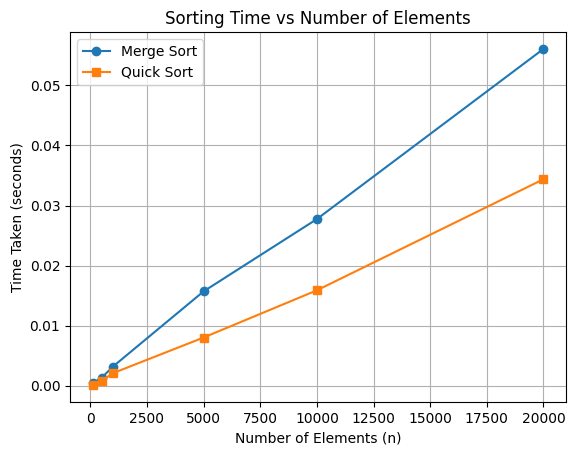

In [ ]:
import random
import time
import matplotlib.pyplot as plt
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        L = arr[:mid]
        R = arr[mid:]
        merge_sort(L)
        merge_sort(R)
        i = j = k = 0
        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr[k] = L[i]
                i += 1
            else:
                arr[k] = R[j]
                j += 1
            k += 1
        while i < len(L):
            arr[k] = L[i]
            i += 1
            k += 1
        while j < len(R):
            arr[k] = R[j]
            j += 1
            k += 1
def quick_sort(arr):
    def _quick_sort(items, low, high):
        if low < high:
            pi = partition(items, low, high)
            _quick_sort(items, low, pi - 1)
            _quick_sort(items, pi + 1, high)
    def partition(items, low, high):
        pivot = items[high]
        i = low - 1
        for j in range(low, high):
            if items[j] <= pivot:
                i += 1
                items[i], items[j] = items[j], items[i]
        items[i + 1], items[high] = items[high], items[i + 1]
        return i + 1
    _quick_sort(arr, 0, len(arr) - 1)
def measure_and_plot():
    sizes = [100, 500, 1000, 5000, 10000, 20000]
    merge_times = []
    quick_times = []
    for n in sizes:
        data = random.sample(range(1, n * 10), n)
        data_merge = data[:]
        start = time.time()
        merge_sort(data_merge)
        merge_times.append(time.time() - start)
        data_quick = data[:]
        start = time.time()
        quick_sort(data_quick)
        quick_times.append(time.time() - start)
    plt.plot(sizes, merge_times, label='Merge Sort', marker='o')
    plt.plot(sizes, quick_times, label='Quick Sort', marker='s')
    plt.xlabel('Number of Elements (n)')
    plt.ylabel('Time Taken (seconds)')
    plt.title('Sorting Time vs Number of Elements')
    plt.legend()
    plt.grid(True)
    plt.show()
measure_and_plot()


In [ ]:
def print_solution(board):
    n = len(board)
    for row in board:
        print(" ".join("Q" if col else "." for col in row))
    print("\n")
def is_safe(board, row, col, n):
    for i in range(row):
        if board[i][col]:
            return False
    for i, j in zip(range(row-1, -1, -1), range(col-1, -1, -1)):
        if board[i][j]:
            return False
    for i, j in zip(range(row-1, -1, -1), range(col+1, n)):
        if board[i][j]:
            return False
    return True
def solve_n_queens_util(board, row, n):
    if row == n:
        print("One of the solutions:")
        print_solution(board)
        return True
    for col in range(n):
        if is_safe(board, row, col, n):
            board[row][col] = 1
            if solve_n_queens_util(board, row + 1, n):
                return True
            board[row][col] = 0
    return False
def solve_n_queens(n):
    board = [[0 for _ in range(n)] for _ in range(n)]
    if not solve_n_queens_util(board, 0, n):
        print("No solution exists.")
n = 8
solve_n_queens(n)

One of the solutions:
Q . . . . . . .
. . . . Q . . .
. . . . . . . Q
. . . . . Q . .
. . Q . . . . .
. . . . . . Q .
. Q . . . . . .
. . . Q . . . .




In [ ]:
import itertools
import math
import random
def generate_distance_matrix(n, seed=42):
    random.seed(seed)
    matrix = [[0]*n for _ in range(n)]
    for i in range(n):
        for j in range(i + 1, n):
            dist = random.randint(10, 100)
            matrix[i][j] = dist
            matrix[j][i] = dist
    return matrix
def tsp_brute_force(dist_matrix):
    n = len(dist_matrix)
    cities = list(range(n))
    min_tour = None
    min_cost = float('inf')
    for perm in itertools.permutations(cities[1:]):
        tour = [0] + list(perm) + [0]
        cost = sum(dist_matrix[tour[i]][tour[i+1]] for i in range(n))
        if cost < min_cost:
            min_cost = cost
            min_tour = tour
    return min_tour, min_cost
def tsp_nearest_neighbor(dist_matrix):
    n = len(dist_matrix)
    visited = [False] * n
    tour = [0]
    visited[0] = True
    current = 0
    cost = 0
    for _ in range(n - 1):
        next_city = min(((j, dist_matrix[current][j]) for j in range(n) if not visited[j]),key=lambda x: x[1])[0]
        cost += dist_matrix[current][next_city]
        tour.append(next_city)
        visited[next_city] = True
        current = next_city
    cost += dist_matrix[current][0]
    tour.append(0)
    return tour, cost
def compare_methods(n=6):
    dist_matrix = generate_distance_matrix(n)
    print("\nDistance Matrix:")
    for row in dist_matrix:
        print(row)
    opt_tour, opt_cost = tsp_brute_force(dist_matrix)
    print("\nOptimal (Exact) Solution:")
    print("Tour:", opt_tour)
    print("Cost:", opt_cost)
    approx_tour, approx_cost = tsp_nearest_neighbor(dist_matrix)
    print("\nApproximate (Nearest Neighbor) Solution:")
    print("Tour:", approx_tour)
    print("Cost:", approx_cost)
    error_percent = ((approx_cost - opt_cost) / opt_cost) * 100
    print(f"\nError in Approximation: {error_percent:.2f}%")
compare_methods(n=6)


Distance Matrix:
[0, 91, 24, 13, 45, 41]
[91, 0, 38, 27, 23, 96]
[24, 38, 0, 79, 21, 85]
[13, 27, 79, 0, 64, 14]
[45, 23, 21, 64, 0, 13]
[41, 96, 85, 14, 13, 0]

Optimal (Exact) Solution:
Tour: [0, 2, 1, 4, 5, 3, 0]
Cost: 125

Approximate (Nearest Neighbor) Solution:
Tour: [0, 3, 5, 4, 2, 1, 0]
Cost: 190

Error in Approximation: 52.00%


In [ ]:
import random
def randomized_partition(arr, low, high):
    pivot_index = random.randint(low, high)
    arr[high], arr[pivot_index] = arr[pivot_index], arr[high]
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] <= pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1
def randomized_select(arr, low, high, k):
    if low == high:
        return arr[low]
    pivot_index = randomized_partition(arr, low, high)
    count = pivot_index - low + 1
    if k == count:
        return arr[pivot_index]
    elif k < count:
        return randomized_select(arr, low, pivot_index - 1, k)
    else:
        return randomized_select(arr, pivot_index + 1, high, k - count)
def find_kth_smallest(arr, k):
    if k < 1 or k > len(arr):
        raise ValueError("k is out of bounds")
    arr_copy = arr[:]
    return randomized_select(arr_copy, 0, len(arr_copy) - 1, k)
if __name__ == "__main__":
    arr = [12, 3, 5, 7, 4, 19, 26]
    k = 3
    result = find_kth_smallest(arr, k)
    print(f"The {k}rd smallest element is: {result}")

The 3rd smallest element is: 5
